In [1]:
# Import the relevant python libraries for the analysis
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import pylab as pl
import math

In [2]:
# Load the dataset
materna = pd.read_csv('mortalidad_materna.csv')
#materna.info()

In [47]:
# Create a variable to hold all Region Names for reference
residence = materna['Descripción de entidad de residencia']
residence = np.unique(residence)
list(residence)

['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Coahuila de Zaragoza',
 'Colima',
 'Distrito Federal',
 'Durango',
 'Estados Unidos de Norteamérica',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Michoacán de Ocampo',
 'Morelos',
 'México',
 'Nayarit',
 'No especificado',
 'Nuevo León',
 'Oaxaca',
 'Otros paises',
 'Otros paises latinoamericanos',
 'Puebla',
 'Querétaro Arteaga',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz de Ignacio de la Llave',
 'Yucatán',
 'Zacatecas']

## Question: Are the differences in Average Age and Distribution of Age of Maternal Death Across Mexico's States/Providences Statistically Significant?

A One-Way Analysis of Variance (ANOVA) test compares the means of two or more groups to determine if at least one group mean is statistically different from the others. These assumptions that must be satisfied in order for the associated p-value to be valid:

1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal. (homoscedasticity)

#### Step 1: Explore the Data and Create Clean Sub-Dataframe for Analysis

In [41]:
# Create variables for Region and Last Recorded Age from materna
residence = materna['Descripción de entidad de residencia']
last_age = materna['Edad cumplida']

# Create variable for Birth and Reason for Mortality in order to remove non-maternal deaths from subset
birth = materna['Año de nacimiento']
mortality_reason = materna['Razón de mortalidad materna']

# Create a subdataset with Region and Last Recorded Age from materna
region_ages = pd.concat([residence, last_age, birth, mortality_reason], axis=1)
region_ages.columns = ['Region', 'Age of Maternal Death', 'Year of Birth', 'Mortality Reason']
region_ages = region_ages.sort_values(by=['Age of Maternal Death'],ascending=False)
region_ages.head()

,Region,Age of Maternal Death,Year of Birth,Mortality Reason
16080,Guerrero,998,0,1
17886,No especificado,998,0,0
13358,Chihuahua,998,0,1
17887,Puebla,998,0,0
14622,Tamaulipas,998,0,1


In [45]:
# Remove irregular values in similar manner to materna_mean_age Jupyter Notebook 

#Remove rows with 0 values in Year of Birth
region_ages = region_ages[region_ages['Year of Birth'] != 0]

#Remove rows with 0 values in Mortality Reason
region_ages = region_ages[region_ages['Mortality Reason'] != 0 ]
region_ages.head()

,Region,Age of Maternal Death,Year of Birth,Mortality Reason
14960,Oaxaca,54,1942,1
9964,Chiapas,53,1961,1
7705,México,53,1963,1
16722,Guerrero,51,1960,1
15461,Distrito Federal,50,1960,1


In [46]:
# Remove Year of Birth and Mortality Reason columns as they are no longer necessary
region_ages = region_ages.drop(['Year of Birth', 'Mortality Reason'], axis=1)
region_ages.head()

,Region,Age of Maternal Death
14960,Oaxaca,54
9964,Chiapas,53
7705,México,53
16722,Guerrero,51
15461,Distrito Federal,50


In [80]:
# Put region_ages in alphabetical order by Region
region_ages = region_ages.sort_values(by=['Region'],ascending=True)
region_ages.head()

,Region,Age of Maternal Death
2614,Aguascalientes,28
2799,Aguascalientes,35
2735,Aguascalientes,30
2460,Aguascalientes,19
2515,Aguascalientes,28


In [125]:
# Create a sample region array variables to hold age distribution per region 
# as a model to construct a function to parse through subdataset, region_ages
aqua = region_ages[region_ages['Region'] == 'Aguascalientes']
aqua = aqua['Age of Maternal Death']
aqua = np.array(aqua)
aqua

array([28, 35, 30, 19, 28, 33, 33, 18, 34, 24, 22, 18, 36, 31, 31, 33, 21,
       38, 19, 19, 23, 24, 16, 28, 20, 42, 31, 29, 29, 25, 29, 33, 20, 26,
       26, 35, 18, 32, 33, 19, 24, 20, 30, 27, 30, 36, 25, 21, 37, 28, 36,
       35, 35, 35, 35, 15, 21, 15, 31, 23, 17, 17, 25, 17, 17, 17, 41, 38,
       16, 23, 40, 43, 32, 35, 22, 36, 22, 18, 17, 35, 36, 30, 25, 39, 39,
       31, 40, 32, 30, 31, 20, 29, 23, 35, 37, 22, 42, 25, 33, 29, 39, 23,
       32, 26, 27, 39, 23, 31, 34, 25, 43, 22, 29, 42, 34, 28, 39, 22, 30,
       27, 21, 20, 37, 20, 38, 28, 20])

In [137]:
def age_array(str):
    """Create arrays for all Ages of Maternal Death within a Region"""
    
    # Select the Ages for Each Region and Store in an Arr
    ages = region_ages[region_ages['Region'] == col]
    ages = ages['Age of Maternal Death']    
    ages = np.array(ages)
    return ages

*Since each Province has differing amounts of total incidences of maternal deaths, each variable must be calculated separately.*

In [136]:
#Apply age_array function to create a age distribution variable for all 34 providences

#Aguascalientes
aqua = age_array('Aguascalientes')
aqua_length = len(aqua)
print('Aguascalientes sample size:' + str(aqua_length))

#Baja California
baja_cal = age_array('Baja California')
baja_cal_length = len(baja_cal)
print('Baja California sample size:' + str(baja_cal_length))

#Baja California Sur
baja_cal_sur = age_array('Baja California Sur')
baja_cal_sur_length = len(baja_cal_sur)
print('Baja California Sur sample size:' + str(baja_cal_sur_length))

#Campeche
cam = age_array('Campeche')
cam_length = len(cam)
print('Campeche sample size:' + str(cam_length))

#Chiapas
chiap = age_array('Chiapas')
chiap_length = len(chiap)
print('Chiapas sample size:' + str(chiap_length))
 
#Chihuahua
chih = age_array('Chihuahua')
chih_length = len(chih)
print('Chihuahua sample size:' + str(chih_length))
 
#Coahuila de Zaragoza
coa = age_array('Coahuila de Zaragoza')
coa_length = len(coa)
print('Coahuila de Zaragoza sample size:' + str(coa_length))

#Colima
coli = age_array('Colima')
coli_length = len(coli)
print('Colima sample size:' + str(coli_length))

#Distrito Federal
distro = age_array('Distrito Federal')
distro_length = len(distro)
print('Distrito Federal sample size:' + str(distro_length))

#Durango
duran = age_array('Durango')
duran_length = len(duran)
print('Durango sample size:' + str(duran_length))

#Estados Unidos de Norteamérica
esta_uni = age_array('Estados Unidos de Norteamérica')
esta_uni_length = len(esta_uni)
print('Estados Unidos de Norteamérica sample size:' + str(esta_uni_length))

#Guanajuato
guana = age_array('Guanajuato')
guana_length = len(guana)
print('Guanajuato sample size:' + str(guana_length))

#Guerrero
guerr = age_array('Guerrero')
guerr_length = len(guerr)
print('Guerrero sample size:' + str(guerr_length))

#Hidalgo
hida = age_array('Hidalgo')
hida_length = len(hida)
print('Hidalgo sample size:' + str(hida_length))
 
#Jalisco
jali = age_array('Jalisco')
jali_length = len(jali)
print('Jalisco sample size:' + str(jali_length))

#Michoacán de Ocampo
micho = age_array('Michoacán de Ocampo')
micho_length = len(micho)
print('Michoacán de Ocampo sample size:' + str(micho_length))

#Morelos
morel = age_array('Morelos')
morel_length = len(morel)
print('Morelos sample size:' + str(morel_length))

#México
mex = age_array('México')
mex_length = len(mex)
print('México sample size:' + str(mex_length))

#Nayarit
naya = age_array('Nayarit')
naya_length = len(naya)
print('Nayarit sample size:' + str(naya_length))

#No especificado // Not Specified // Need to Analyze Further
no_region = age_array('No especificado')
no_region_length = len(no_region)
print('No especificado sample size:' + str(no_region_length))
 
#Nuevo León
nuevo = age_array('Nuevo León')
nuevo_length = len(nuevo)
print('Nuevo León sample size:' + str(nuevo_length))

#Oaxaca
oaxa = age_array('Oaxaca')
oaxa_length = len(oaxa)
print('Oaxaca sample size:' + str(oaxa_length))

#Otros paises
otros = age_array('Otros paises')
otros_length = len(otros)
print('Otros sample size:' + str(otros_length))

#Otros paises latinoamericanos
otros_lat = age_array('Otros paises latinoamericanos')
otros_lat_length = len(otros_lat)
print('Otros paises latinoamericanos sample size:' + str(otros_lat_length))

#Puebla
pueb = age_array('Puebla')
pueb_length = len(pueb)
print('Puebla sample size:' + str(pueb_length))

#Querétaro Arteaga
quer = age_array('Querétaro Arteaga')
quer_length = len(quer)
print('Querétaro Arteaga sample size:' + str(quer_length))

#Quintana Roo
quinta = age_array('Quintana Roo')
quinta_length = len(quinta)
print('Quintana sample size:' + str(quinta_length))

#San Luis Potosí
san_luis = age_array('San Luis Potosí')
san_luis_length = len(san_luis)
print('San Luis Potosí sample size:' + str(san_luis_length))

#Sinaloa
sinal = age_array('Sinaloa')
sinal_length = len(sinal)
print('Sinaloa sample size:' + str(sinal_length))

#Sonora
sono = age_array('Sonora')
sono_length = len(sono)
print('Sonora sample size:' + str(sono_length))

#Tabasco
tabasco = age_array('Tabasco')
tabasco_length = len(tabasco)
print('Tabasco sample size:' + str(tabasco_length))

#Tamaulipas
tamau = age_array('Tamaulipas')
tamau_length = len(tamau)
print('Tamaulipas sample size:' + str(tamau_length))

#Tlaxcala
tlaxc = age_array('Tlaxcala')
tlaxc_length = len(tlaxc)
print('Tlaxcala sample size:' + str(tlaxc_length))

#Veracruz de Ignacio de la Llave
vera_ign = age_array('Veracruz de Ignacio de la Llave')
vera_ign_length = len(vera_ign)
print('Veracruz de Ignacio de la Llave sample size:' + str(vera_ign_length))

#Yucatán
yuca = age_array('Yucatán')
yuca_length = len(yuca)
print('Yucatán sample size:' + str(yuca_length))

#Zacatecas
zaca = age_array('Zacatecas')
zaca_length = len(zaca)
print('Zacatecas sample size:' + str(zaca_length))

Aguascalientes sample size:361
Baja California sample size:361
Baja California Sur sample size:361
Campeche sample size:361
Chiapas sample size:361
Chihuahua sample size:361
Coahuila de Zaragoza sample size:361
Colima sample size:361
Distrito Federal sample size:361
Durango sample size:361
Estados Unidos de Norteamérica sample size:361
Guanajuato sample size:361
Guerrero sample size:361
Hidalgo sample size:361
Jalisco sample size:361
Michoacán de Ocampo sample size:361
Morelos sample size:361
México sample size:361
Nayarit sample size:361
No especificado sample size:361
Nuevo León sample size:361
Oaxaca sample size:361
Otros sample size:361
Otros paises latinoamericanos sample size:361
Puebla sample size:361
Querétaro Arteaga sample size:361
Quintana sample size:361
San Luis Potosí sample size:361
Sinaloa sample size:361
Sonora sample size:361
Tabasco sample size:361
Tamaulipas sample size:361
Tlaxcala sample size:361
Veracruz de Ignacio de la Llave sample size:361
Yucatán sample size:

#### Step 2: Assess if the distribution of age of maternal death within each region is Normally Distributed.
- Create Empirical and Theoretical CDFs

In [124]:
# Create an Empirical Cumulative Distribution Function (ECDF)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(data)+1) / len(data)

    return x, y

In [126]:
# Seed the random number generator
np.random.seed(15)

# Compute the theoretical CDF using the full list of ages 
cdf_mean = np.mean(region_ages['Age of Maternal Death'])
cdf_std = np.std(region_ages['Age of Maternal Death'])

# Simulate a random sample with the same distribution and size of 10,000
cdf_samples = np.random.normal(cdf_mean, cdf_std, size=10000)
cdf_samples

array([26.06959029, 30.84132168, 27.21504589, ..., 33.86348911,
       22.34975498, 28.10388849])

In [128]:
# Compute the CDFs

# norm CDF
x_norm, y_norm = ecdf(cdf_samples)

# ----- Empirical CDFs ------

#Aguascalientes
x_aqua, y_aqua = ecdf(aqua)

#Baja California
x_baja_cal, y_baja_cal = ecdf(baja_cal)

#Baja California Sur
x_baja_cal_sur, y_baja_cal_sur = ecdf(baja_cal_sur)

#Campeche
x_cam, y_cam = ecdf(cam)

#Chiapas
x_chiap, y_chiap = ecdf(chiap)
 
#Chihuahua
x_chih, y_chih = ecdf(chih)
 
#Coahuila de Zaragoza
x_coa, y_coa = ecdf(coa)

#Colima
x_coli, y_coli = ecdf(coli)

#Distrito Federal
x_distro, y_distro = ecdf(distro)

#Durango
x_duran, y_duran = ecdf(duran)

#Estados Unidos de Norteamérica
x_esta_uni, y_esta_uni = ecdf(esta_uni)

#Guanajuato
x_guana, y_guana = ecdf(guana)

#Guerrero
x_guerr, y_guerr = ecdf(guerr)

#Hidalgo
x_hida, y_hida = ecdf(hida)
 
#Jalisco
x_jali, y_jali = ecdf(jali)

#Michoacán de Ocampo
x_micho, y_micho = ecdf(micho)

#Morelos
x_morel, y_morel = ecdf(morel)

#México
x_mex, y_mex = ecdf(mex)

#Nayarit
x_naya, y_naya = ecdf(naya)

#No especificado // Not Specified // Need to Analyze Further
x_no_region, y_no_region = ecdf(no_region)
 
#Nuevo León
x_nuevo, y_nuevo = ecdf(nuevo)

#Oaxaca
x_oaxa, y_oaxa = ecdf(oaxa)

#Otros paises
x_otros, y_otros = ecdf(otros)

#Otros paises latinoamericanos
x_otros_lat, y_otros_lat = ecdf(otros_lat)

#Puebla
x_pueb, y_pueb = ecdf(pueb)

#Querétaro Arteaga
x_quer, y_quer = ecdf(quer)

#Quintana Roo
x_quinta, y_quinta = ecdf(quinta)

#San Luis Potosí
x_san_luis, y_san_luis = ecdf(san_luis)

#Sinaloa
x_sinal, y_sinal = ecdf(sinal)

#Sonora
x_sono, y_sono = ecdf(sono)

#Tabasco
x_tabasco, y_tabasco = ecdf(tabasco)

#Tamaulipas
x_tamau, y_tamau = ecdf(tamau)

#Tlaxcala
x_tlaxc, y_tlaxc = ecdf(tlaxc)

#Veracruz de Ignacio de la Llave
x_vera_ign, y_vera_ign = ecdf(vera_ign)

#Yucatán
x_yuca, y_yuca = ecdf(yuca)

#Zacatecas
x_zaca, y_zaca = ecdf(zaca)

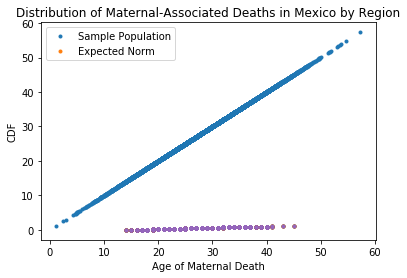

In [133]:
# Plot 5 ECDFs on same plot

# --- norm ---
fig = plt.plot(x_norm, x_norm, marker='.', linestyle='none')

# --- 4 regions ---
fig = plt.plot(x_aqua, y_aqua, marker='.', linestyle='none')
fig = plt.plot(x_baja_cal, y_baja_cal, marker='.', linestyle='none')
fig = plt.plot(x_baja_cal_sur, y_baja_cal_sur, marker='.', linestyle='none')
fig = plt.plot(x_cam, y_cam, marker='.', linestyle='none')

# Label figure
fig = plt.xlabel('Age of Maternal Death')
fig = plt.ylabel('CDF')
fig = plt.legend(('Sample Population', 'Expected Norm'))
fig = plt.title('Distribution of Maternal-Associated Deaths in Mexico by Region')

# Save plots
plt.show()

## One-Way Analysis of Variance

$H$o: All mean age of death of maternal women within all Province of Mexico are statistically similar. <br>  Empirical Mean ($μ$) − Population Mean ($μ$) = 0

$H$a: There is at least one mean age of death of maternal women within a Province of Mexico that is statistically different from the rest. <br> Empirical Mean ($μ$) − Population Mean ($μ$) ≠ 0

Significance Level: *95%* Confidence. <br> $α$ = 0.05